In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('shootings.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              128 non-null    object
 1   location                          128 non-null    object
 2   date                              128 non-null    object
 3   summary                           128 non-null    object
 4   fatalities                        128 non-null    int64 
 5   injured                           128 non-null    object
 6   total_victims                     128 non-null    object
 7   location.1                        128 non-null    object
 8   age_of_shooter                    128 non-null    object
 9   prior_signs_mental_health_issues  128 non-null    object
 10  mental_health_details             128 non-null    object
 11  weapons_obtained_legally          128 non-null    object
 12  where_obtained        

In [2]:
df.describe()

,fatalities,year
count,128.000000,128.000000
mean,8.039062,2009.171875
std,7.687194,10.603899
min,3.000000,1982.000000
25%,4.000000,2000.750000
50%,6.000000,2013.000000
75%,9.000000,2018.000000
max,58.000000,2022.000000


In [3]:
# 1. Convert 'age_of_shooter' to numeric, forcing errors to NaN
df['age_of_shooter'] = pd.to_numeric(df['age_of_shooter'], errors='coerce')

# 2. Clean 'injured' and 'total_victims' columns by removing non-numeric characters and converting to numeric
df['injured'] = pd.to_numeric(df['injured'].replace(r'[^\d]+', '', regex=True), errors='coerce')
df['total_victims'] = pd.to_numeric(df['total_victims'].replace(r'[^\d]+', '', regex=True), errors='coerce')

# 3. Check for any missing values in critical columns
missing_data = df[['age_of_shooter', 'injured', 'total_victims']].isnull().sum()

# 4. Get a summary of the data
summary = df.describe()

# Output the missing data and summary statistics
print("Missing Data in Key Columns:")
print(missing_data)
print("\nSummary Statistics (describe()):")
print(summary)

Missing Data in Key Columns:
age_of_shooter    4
injured           1
total_victims     1
dtype: int64

Summary Statistics (describe()):
       fatalities     injured  total_victims  age_of_shooter         year
count  128.000000  127.000000     127.000000      124.000000   128.000000
mean     8.039062   11.511811      19.496063       33.741935  2009.171875
std      7.687194   48.910327      54.300585       12.300354    10.603899
min      3.000000    0.000000       3.000000       11.000000  1982.000000
25%      4.000000    1.000000       6.500000       23.750000  2000.750000
50%      6.000000    3.000000      10.000000       33.500000  2013.000000
75%      9.000000   10.000000      17.000000       42.250000  2018.000000
max     58.000000  546.000000     604.000000       66.000000  2022.000000


In [4]:
# Fill missing values with the median for 'injured' and 'total_victims'
df['injured'] = df['injured'].fillna(df['injured'].median())
df['total_victims'] = df['total_victims'].fillna(df['total_victims'].median())

# Check again for any missing values
missing_data_after_fill = df[['injured', 'total_victims']].isnull().sum()

# Print the missing data counts after filling
print("Missing Data After Filling:")
print(missing_data_after_fill)

# Output the cleaned DataFrame summary
summary_after_fill = df.describe()
print("\nSummary Statistics After Filling Missing Data:")
print(summary_after_fill)


Missing Data After Filling:
injured          0
total_victims    0
dtype: int64

Summary Statistics After Filling Missing Data:
       fatalities     injured  total_victims  age_of_shooter         year
count  128.000000  128.000000     128.000000      124.000000   128.000000
mean     8.039062   11.445312      19.421875       33.741935  2009.171875
std      7.687194   48.723195      54.092893       12.300354    10.603899
min      3.000000    0.000000       3.000000       11.000000  1982.000000
25%      4.000000    1.000000       6.750000       23.750000  2000.750000
50%      6.000000    3.000000      10.000000       33.500000  2013.000000
75%      9.000000   10.000000      17.000000       42.250000  2018.000000
max     58.000000  546.000000     604.000000       66.000000  2022.000000


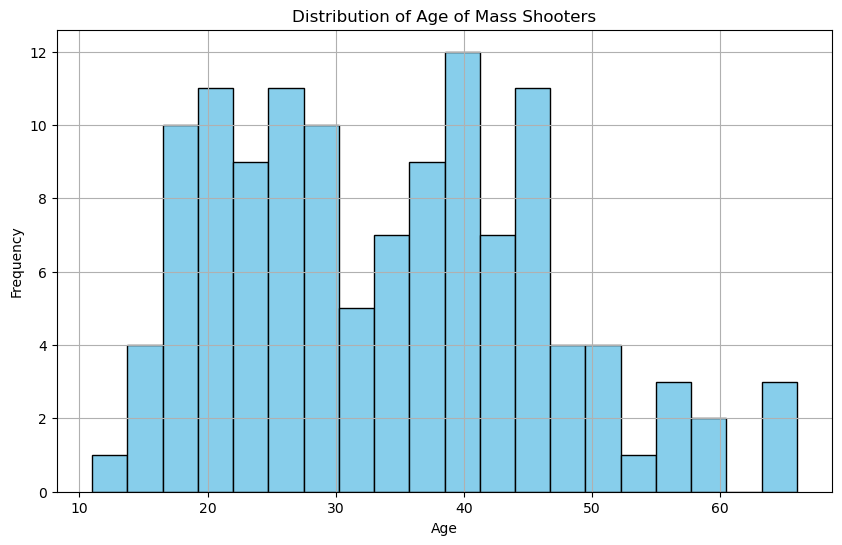

In [5]:
# Plot histogram for 'age_of_shooter'
plt.figure(figsize=(10, 6))
plt.hist(df['age_of_shooter'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Age of Mass Shooters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

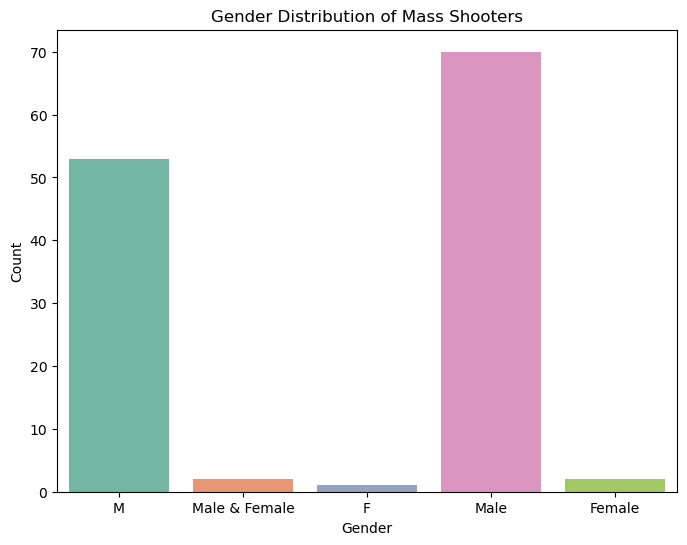

In [6]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution of Mass Shooters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

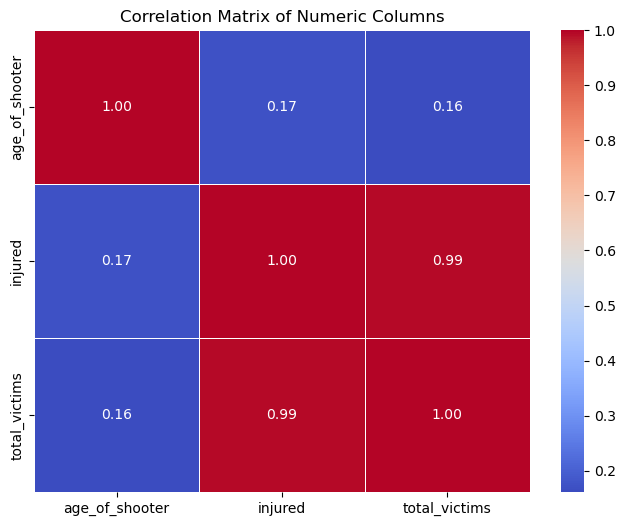

In [7]:
# Select numeric columns for correlation analysis
numeric_cols = df[['age_of_shooter', 'injured', 'total_victims']]

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


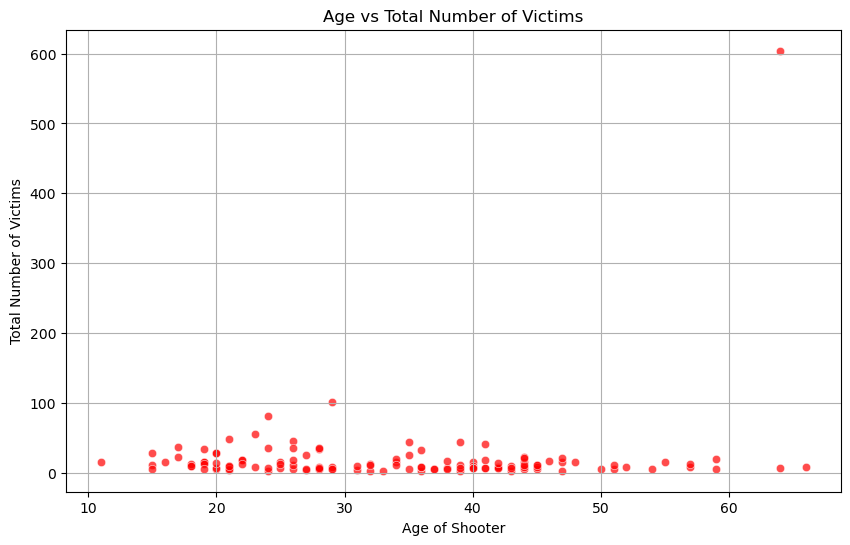

In [8]:
# Scatter plot of age vs total victims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_of_shooter', y='total_victims', color='red', alpha=0.7)
plt.title('Age vs Total Number of Victims')
plt.xlabel('Age of Shooter')
plt.ylabel('Total Number of Victims')
plt.grid(True)
plt.show()


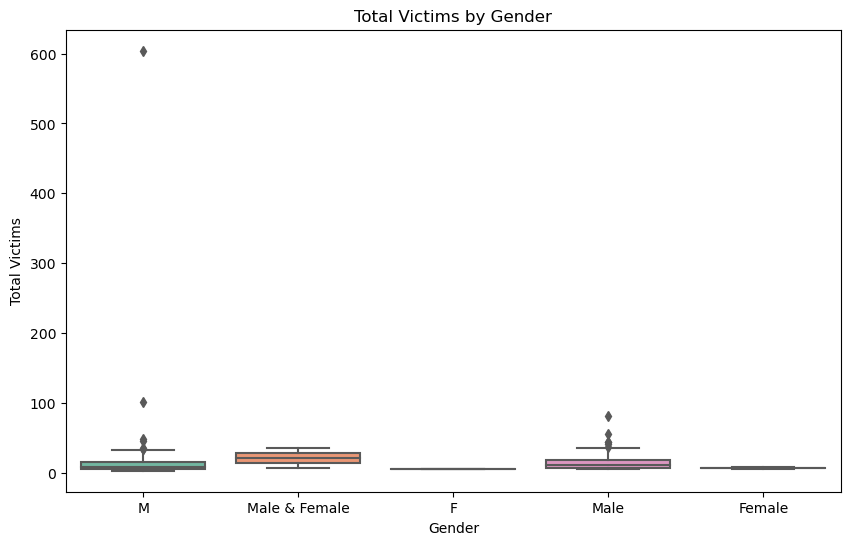

In [9]:
# Boxplot for total victims by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='total_victims', palette='Set2')
plt.title('Total Victims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Victims')
plt.show()


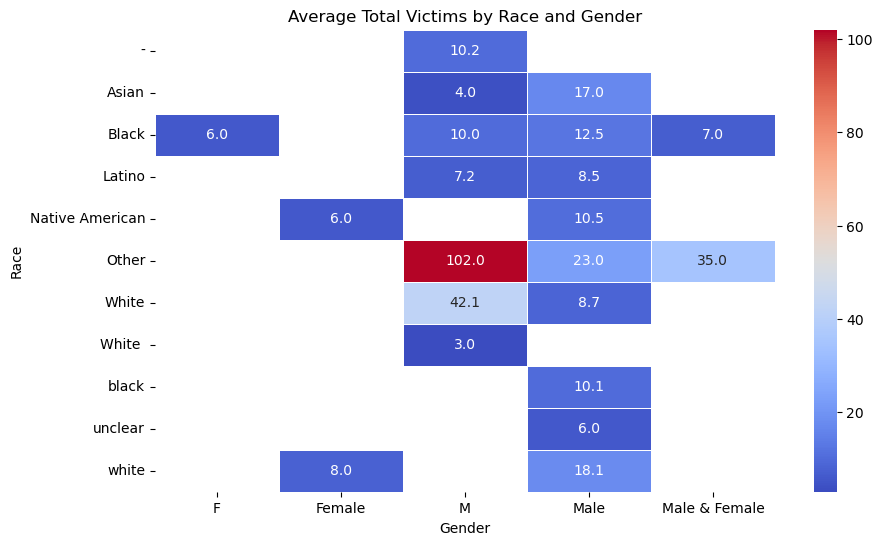

In [10]:
# Calculate mean total victims by race and gender
race_gender_avg_victims = df.groupby(['race', 'gender'])['total_victims'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(race_gender_avg_victims, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Average Total Victims by Race and Gender')
plt.xlabel('Gender')
plt.ylabel('Race')
plt.show()


In [17]:
#correlation between age,race,gender and number of victims
df_encoded = pd.get_dummies(df[['race', 'gender']], drop_first=True)

# Add the 'age_of_shooter' and 'total_victims' (or 'fatalities') columns to the encoded dataframe for correlation analysis
df_encoded['age_of_shooter'] = df['age_of_shooter']
df_encoded['total_victims'] = df['total_victims']

# Calculate the correlation matrix for age, race, gender, and number of victims
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
correlation_matrix

,race_Asian,race_Black,race_Latino,race_Native American,race_Other,race_White,race_White,race_black,race_unclear,race_white,gender_Female,gender_M,gender_Male,gender_Male & Female,age_of_shooter,total_victims
race_Asian,1.000000,-0.083045,-0.075165,-0.040000,-0.052058,-0.130359,-0.022911,-0.071007,-0.022911,-0.177250,-0.032530,-0.086001,0.105357,-0.032530,0.101997,-0.027180
race_Black,-0.083045,1.000000,-0.093631,-0.049827,-0.064848,-0.162386,-0.028540,-0.088452,-0.028540,-0.220797,-0.040522,0.164947,-0.245658,0.175596,0.045932,-0.057237
race_Latino,-0.075165,-0.093631,1.000000,-0.045099,-0.058694,-0.146976,-0.025832,-0.080058,-0.025832,-0.199844,-0.036677,0.109892,-0.085892,-0.036677,0.037668,-0.063331
race_Native American,-0.040000,-0.049827,-0.045099,1.000000,-0.031235,-0.078215,-0.013747,-0.042604,-0.013747,-0.106350,0.396866,-0.130231,0.037280,-0.019518,-0.112361,-0.029965
race_Other,-0.052058,-0.064848,-0.058694,-0.031235,1.000000,-0.101793,-0.017891,-0.055447,-0.017891,-0.138409,-0.025402,-0.087622,0.021517,0.299740,-0.075996,0.081492
race_White,-0.130359,-0.162386,-0.146976,-0.078215,-0.101793,1.000000,-0.044801,-0.138846,-0.044801,-0.346592,-0.063609,0.482321,-0.437628,-0.063609,-0.063537,0.176604
race_White,-0.022911,-0.028540,-0.025832,-0.013747,-0.017891,-0.044801,1.000000,-0.024403,-0.007874,-0.060916,-0.011180,0.105558,-0.097484,-0.011180,-0.005461,-0.027045
race_black,-0.071007,-0.088452,-0.080058,-0.042604,-0.055447,-0.138846,-0.024403,1.000000,-0.024403,-0.188790,-0.034648,-0.231183,0.250330,-0.034648,0.165742,-0.047522
race_unclear,-0.022911,-0.028540,-0.025832,-0.013747,-0.017891,-0.044801,-0.007874,-0.024403,1.000000,-0.060916,-0.011180,-0.074594,0.080772,-0.011180,-0.042262,-0.022104
race_white,-0.177250,-0.220797,-0.199844,-0.106350,-0.138409,-0.346592,-0.060916,-0.188790,-0.060916,1.000000,0.048518,-0.577085,0.591246,-0.086489,0.007809,-0.020602


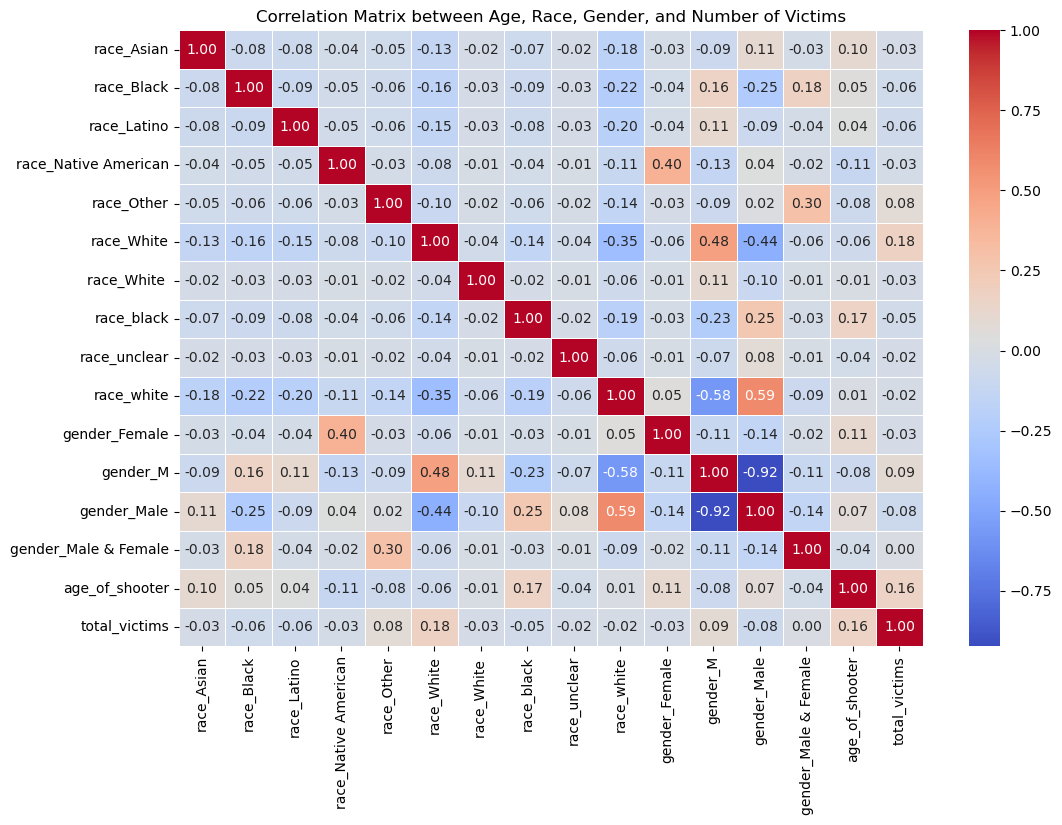

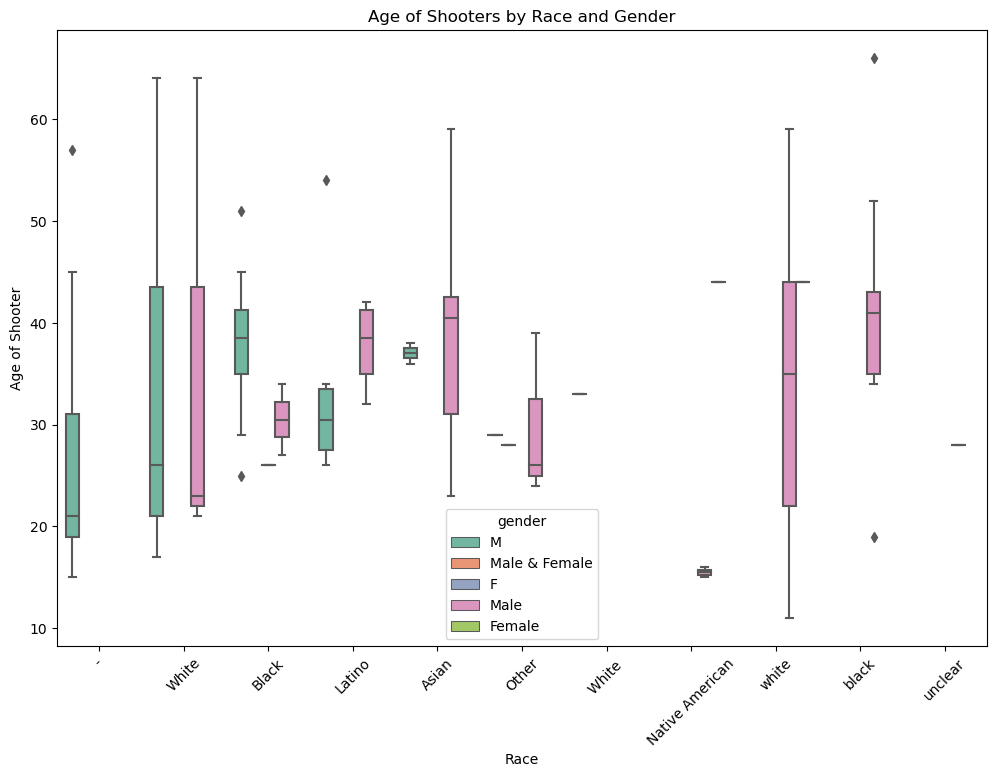

In [19]:
#heatmap and box plot for correlation between age,gender,race and number of victims
df_encoded = pd.get_dummies(df[['race', 'gender']], drop_first=True)

# Add the 'age_of_shooter' and 'total_victims' columns to the encoded dataframe for correlation analysis
df_encoded['age_of_shooter'] = df['age_of_shooter']
df_encoded['total_victims'] = df['total_victims']

# Calculate the correlation matrix for age, race, gender, and number of victims
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Age, Race, Gender, and Number of Victims')
plt.show()

# Create the boxplot for 'age_of_shooter' by 'race' and 'gender'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='race', y='age_of_shooter', hue='gender', palette='Set2')
plt.title('Age of Shooters by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Age of Shooter')
plt.xticks(rotation=45)
plt.show()